# Visuals

### Import necessary Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

### Load Dataset

In [2]:
# Load Dataset
df = pd.read_csv("NigeriaInflationRates_2015_to_2023.csv")

# View first 5 rows
#print(df.sample(5))

#### Calculating average inflation for each month 
And ploting a line chart showing seasonal inflation trends across the year.
Revealing recurring monthly inflation patterns.


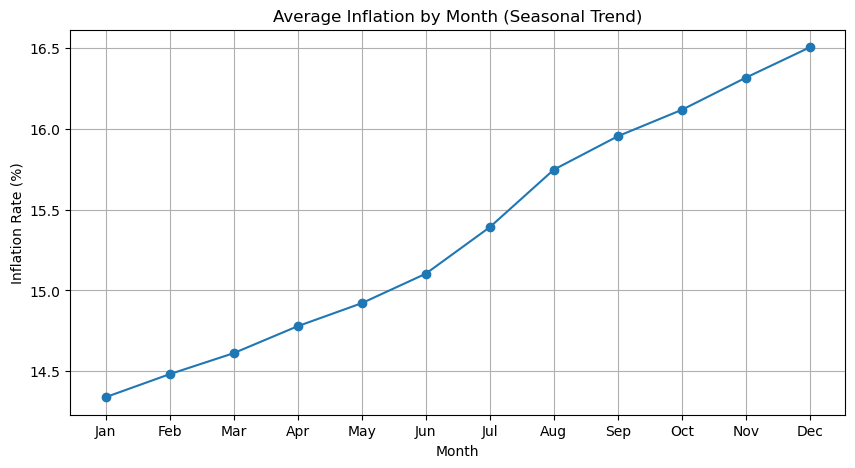

In [3]:
# Ensure months are in proper order
month_order = list(calendar.month_abbr)[1:]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Average inflation per month
monthly_trend = df.groupby('Month')['Inflation_Rate'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_trend['Month'], monthly_trend['Inflation_Rate'], marker='o')
plt.title('Average Inflation by Month (Seasonal Trend)')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

#### Calculating and plots the average inflation rate for each year (2015–2023)
Ensuring no missing years. visualizing long-term inflation trends over time.

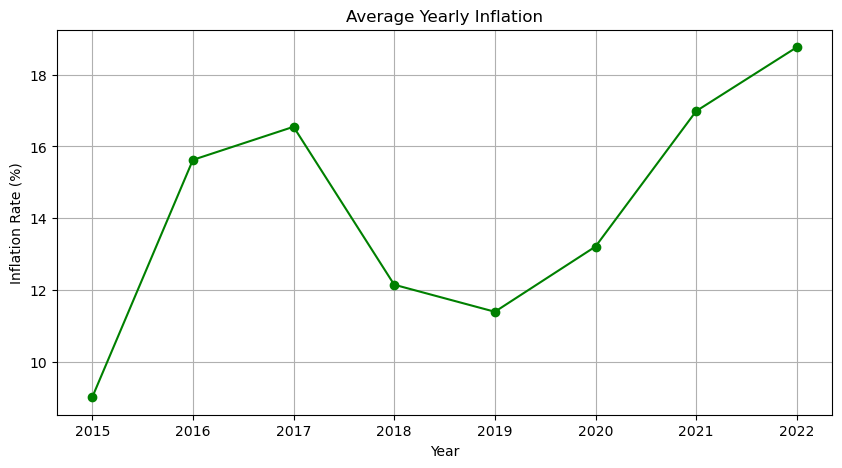

In [4]:
# Define all years
all_years = pd.DataFrame({'Year': range(2015, 2023)})

# Calculate yearly average inflation
yearly_trend = df.groupby('Year')['Inflation_Rate'].mean().reset_index()

# Merge with full year range to ensure all years are included
yearly_trend = pd.merge(all_years, yearly_trend, on='Year', how='left')

# Plot
plt.figure(figsize=(10,5))
plt.plot(yearly_trend['Year'], yearly_trend['Inflation_Rate'], marker='o', color='green')
plt.title('Average Yearly Inflation')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Year')
plt.xticks(yearly_trend['Year'])  # ensure all years show on x-axis
plt.grid(True)
plt.show()

#### Creating a heatmap  to show inflation rates by year and month.
making it easy to spot periods of high and low inflation. 
Using a pivot table and color intensity to visualize inflation trends over time.

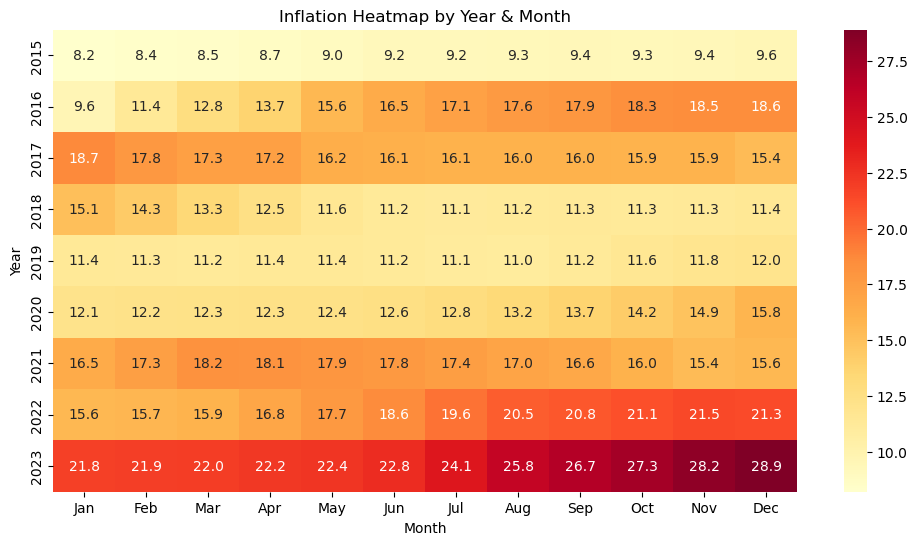

In [5]:
# Create a pivot table with years as rows, months as columns, and inflation rates as values
pivot = df.pivot(index='Year', columns='Month', values='Inflation_Rate')

# Create a figure with specified dimensions (width=12, height=6 inches)
plt.figure(figsize=(12,6))

# Generate a heatmap visualization using the pivot table data
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".1f")

# Add a title to the heatmap
plt.title('Inflation Heatmap by Year & Month')

# Display the visualization
plt.show()

#### Visualizing correlations between inflation, crude oil variables, and CPI categories. 
Showing how strongly each factor relates to inflation, highlighting key economic drivers.

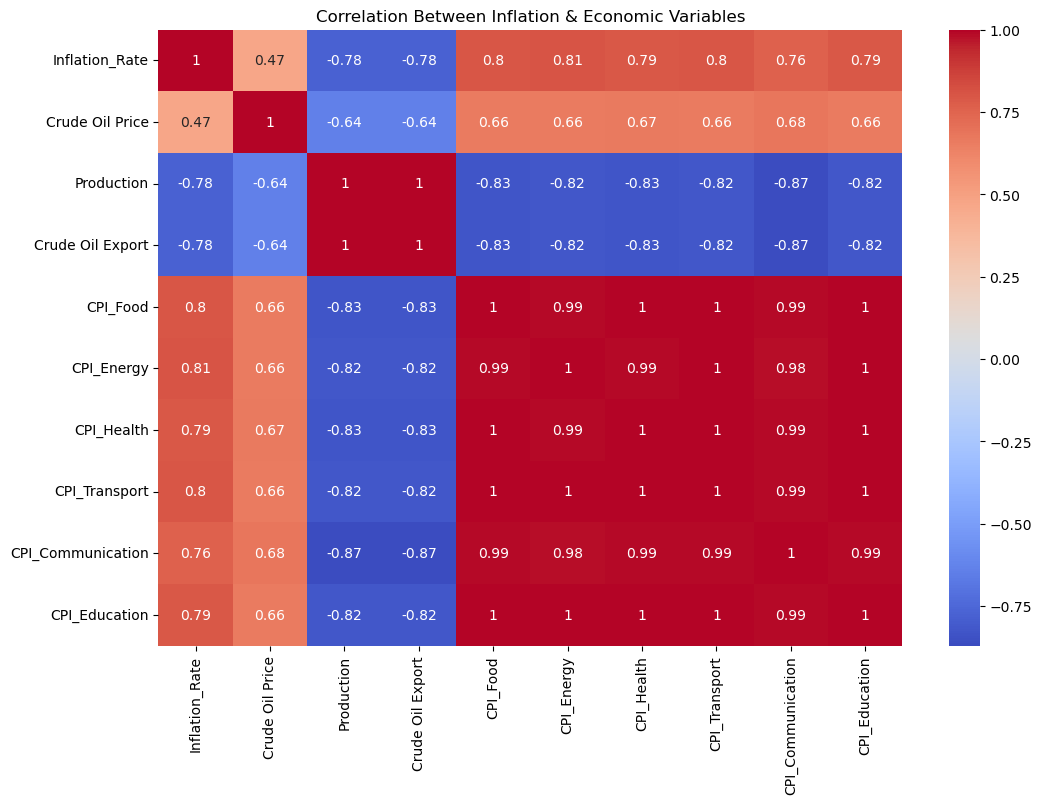

In [6]:
# Calculate correlation matrix between inflation rate, crude oil price, production, export and all CPI columns
# Round correlation values to 2 decimal 
corr = df[['Inflation_Rate','Crude Oil Price',
           'Production','Crude Oil Export'] + [col for col in df.columns if col.startswith('CPI_')]].corr().round(2)

# Create a figure with specified size for better visualization
plt.figure(figsize=(12,8))
# Generate a heatmap of the correlation matrix with numerical annotations and a color gradient
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Add a descriptive title to the plot
plt.title('Correlation Between Inflation & Economic Variables')
# Display the visualization
plt.show()

#### Creating a dual-axis plot comparing inflation rates and crude oil prices over the years. 
Showing changes in oil prices relate to inflation trends.

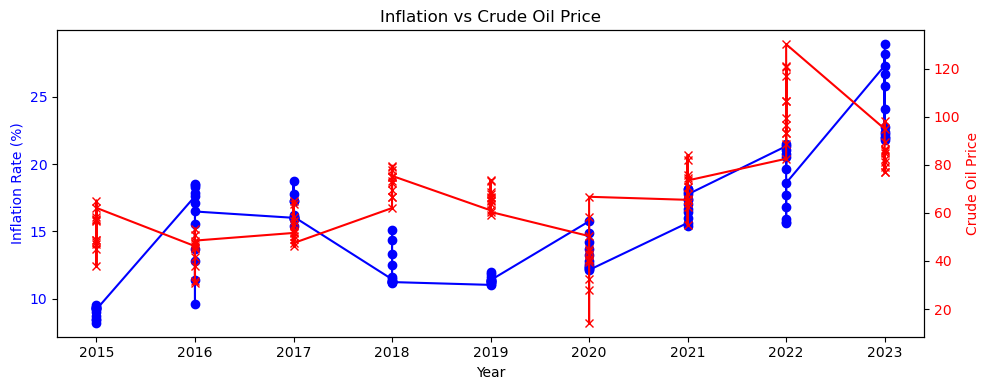

In [7]:
# Sort by Year to ensure correct order
df_sorted = df.sort_values('Year')

# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(df_sorted['Year'], df_sorted['Inflation_Rate'], color='blue', marker='o', label='Inflation Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(2015, 2024))

ax2 = ax1.twinx()
ax2.plot(df_sorted['Year'], df_sorted['Crude Oil Price'], color='red', marker='x', label='Crude Oil Price')
ax2.set_ylabel('Crude Oil Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Inflation vs Crude Oil Price')
fig.tight_layout()
plt.show()

#### Calculating and plots the year-over-year percentage change in average inflation. 
Highlighting how inflation growth or decline varies from one year to the next.

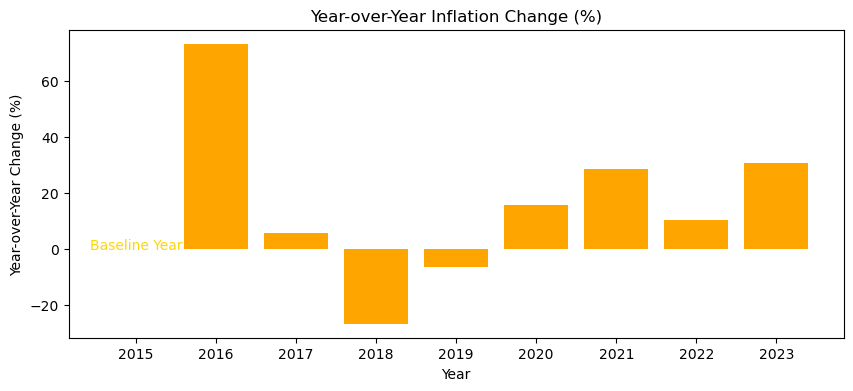

In [8]:
# Group yearly average inflation
yearly_avg = df.groupby('Year')['Inflation_Rate'].mean().reset_index()

# Sort by Year just to be safe
yearly_avg = yearly_avg.sort_values('Year')

# Calculate YoY change
yearly_avg['Year-over-Year_Change'] = yearly_avg['Inflation_Rate'].pct_change() * 100

# Fill first year YoY with 0
yearly_avg['Year-over-Year_Change'].iloc[0] = 0

# Plot bar chart
plt.figure(figsize=(10,4))
plt.bar(yearly_avg['Year'], yearly_avg['Year-over-Year_Change'], color='orange')
baseline_year = yearly_avg['Year'].min()
plt.text(
    baseline_year,                 
    0,                    
    "Baseline Year",      
    ha='center', color='gold', fontsize=10, fontstyle='normal'
)
plt.title('Year-over-Year Inflation Change (%)')
plt.ylabel('Year-over-Year Change (%)')
plt.xlabel('Year')
plt.xticks(yearly_avg['Year'])
plt.show()

#### Ploting a histogram show how inflation rates are distributed over time. 
Identifying the most frequent inflation levels and detect extreme values or outliers.

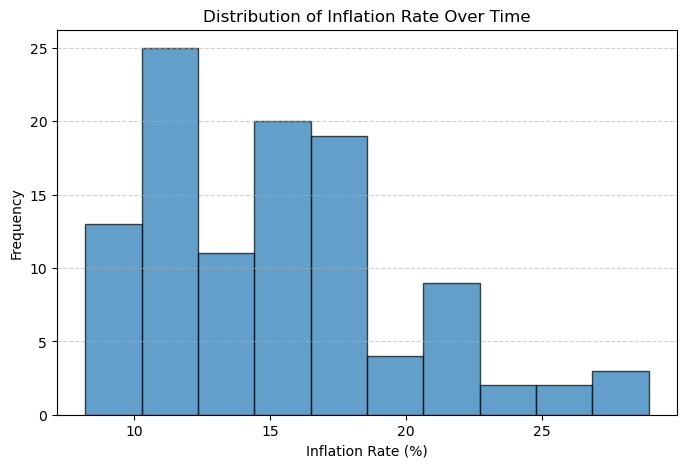

In [9]:
# Create a figure 
plt.figure(figsize=(8,5))
# Create a histogram of inflation rates
plt.hist(df['Inflation_Rate'], bins=10, edgecolor='black', alpha=0.7)
# Add a title to the histogram
plt.title('Distribution of Inflation Rate Over Time')
# Label the x-axis
plt.xlabel('Inflation Rate (%)')
# Label the y-axis
plt.ylabel('Frequency')
# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Display the plot
plt.show()

#### Creating a pie chart showing the average contribution of each CPI component. 
Visualizing which sectors (like food or energy) most influence overall inflation.

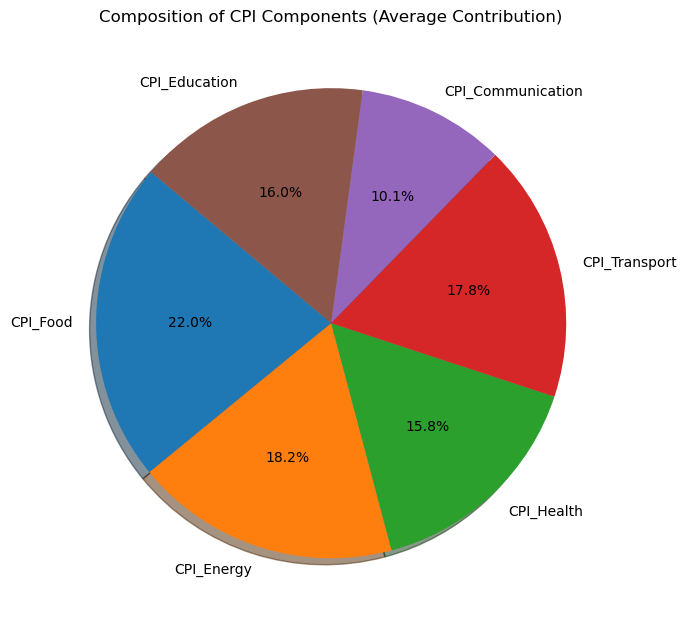

In [10]:
# CPI columns
cpi_columns = ['CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport', 'CPI_Communication', 'CPI_Education']

# Average of each CPI component
cpi_avg = df[cpi_columns].mean()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    cpi_avg,
    labels=cpi_avg.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title('Composition of CPI Components (Average Contribution)')
plt.tight_layout()
plt.show()